In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop



array([[[241, 245, 246],
        [241, 245, 246],
        [241, 245, 246],
        ...,
        [222, 226, 227],
        [222, 226, 227],
        [223, 227, 228]],

       [[241, 245, 246],
        [241, 245, 246],
        [241, 245, 246],
        ...,
        [222, 226, 227],
        [222, 226, 227],
        [223, 227, 228]],

       [[241, 245, 246],
        [241, 245, 246],
        [241, 245, 246],
        ...,
        [222, 226, 227],
        [222, 226, 227],
        [223, 227, 228]],

       ...,

       [[230, 234, 235],
        [228, 232, 233],
        [228, 232, 233],
        ...,
        [222, 227, 226],
        [222, 227, 226],
        [223, 228, 227]],

       [[230, 234, 235],
        [228, 232, 233],
        [229, 233, 234],
        ...,
        [222, 227, 226],
        [223, 228, 227],
        [223, 228, 227]],

       [[231, 235, 236],
        [229, 233, 234],
        [229, 233, 234],
        ...,
        [222, 227, 226],
        [223, 228, 227],
        [223, 228, 227]]

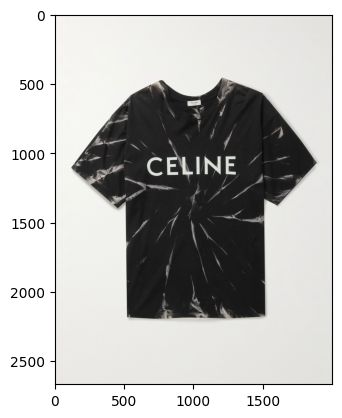

In [3]:
img=image.load_img(r"D:\AI\light_dark_cnn\training\dark\869.jpg")
plt.imshow(img)
cv2.imread(r"D:\AI\light_dark_cnn\training\dark\869.jpg")


In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset=train.flow_from_directory(r"D:\AI\light_dark_cnn\training",
                                        target_size=(200,200),
                                        batch_size=16,
                                        class_mode='sparse')
validation_dataset=validation.flow_from_directory(r'D:\AI\light_dark_cnn\validation',
                                             target_size=(200,200),
                                             batch_size=16,
                                             class_mode='sparse')

Found 929 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'dark': 0, 'light': 1}

In [8]:
# train_dataset.classes

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [11]:
model.fit(train_dataset,
          epochs=70,
          batch_size=60,
          validation_data=validation_dataset)


Epoch 1/70


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7911 - loss: 1.3698 - val_accuracy: 0.9432 - val_loss: 0.1191
Epoch 2/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 630ms/step - accuracy: 0.8969 - loss: 0.2816 - val_accuracy: 0.9432 - val_loss: 0.2127
Epoch 3/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 652ms/step - accuracy: 0.9306 - loss: 0.2073 - val_accuracy: 0.8864 - val_loss: 0.2768
Epoch 4/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 650ms/step - accuracy: 0.9118 - loss: 0.2291 - val_accuracy: 0.9659 - val_loss: 0.1479
Epoch 5/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 648ms/step - accuracy: 0.9316 - loss: 0.1884 - val_accuracy: 0.9545 - val_loss: 0.1309
Epoch 6/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 649ms/step - accuracy: 0.9349 - loss: 0.1970 - val_accuracy: 0.9545 - val_loss: 0.0889
Epoch 7/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 662ms/step - accuracy: 0.9249 - loss: 0.2274 - val_accuracy: 0.9545 - val_loss: 0.0961
Epoch 8/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 43s 663ms/step - accuracy: 0.9350 - loss: 0.1824 - val_accuracy: 0.9545 -

In [12]:
model.save("LD_cnn.h5")

In [1]:
from keras.models import load_model
loaded_model = load_model('LD_cnn.h5')


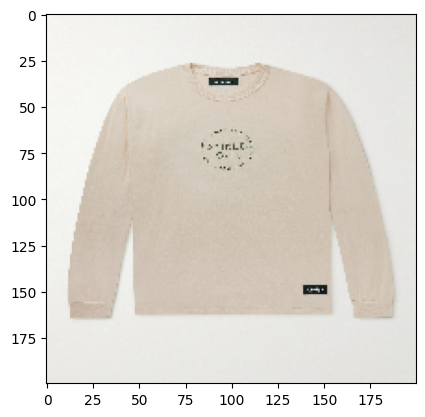

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Light


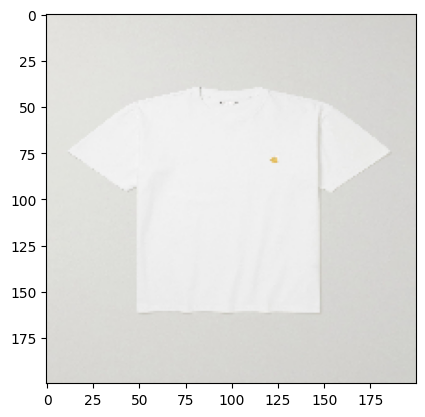

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Light


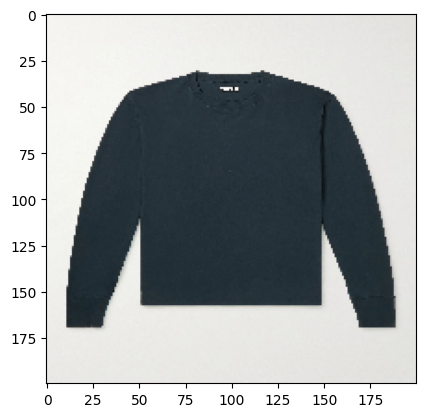

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Dark


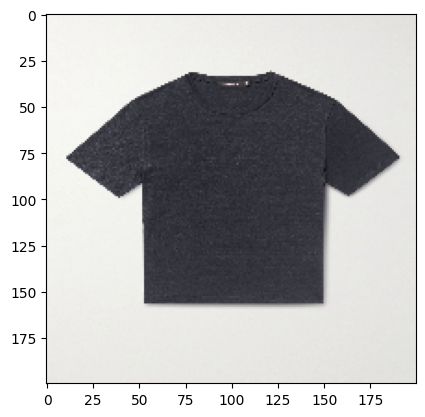

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Dark


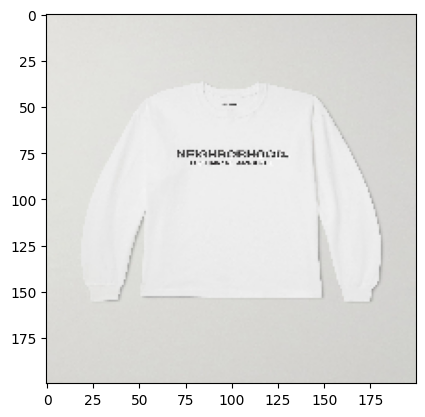

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Light


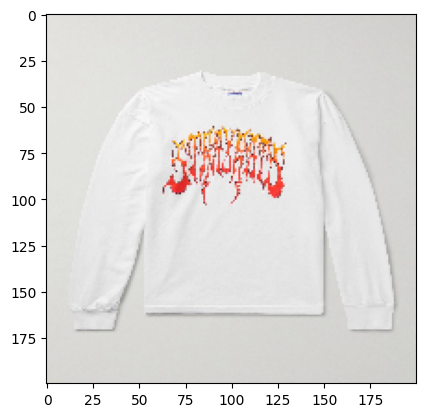

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Light


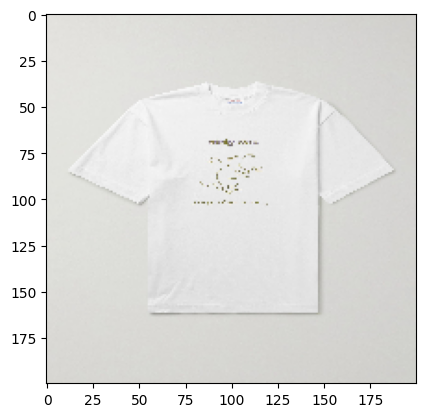

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Light


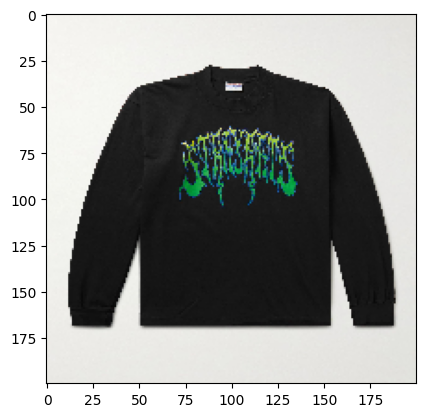

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Dark


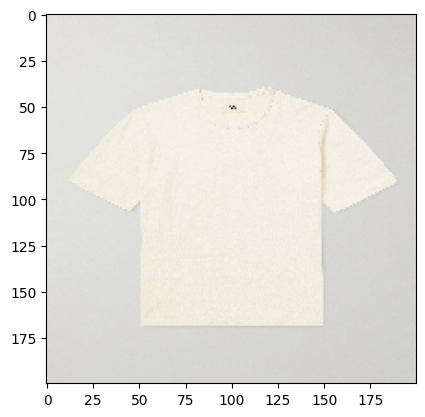

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Light


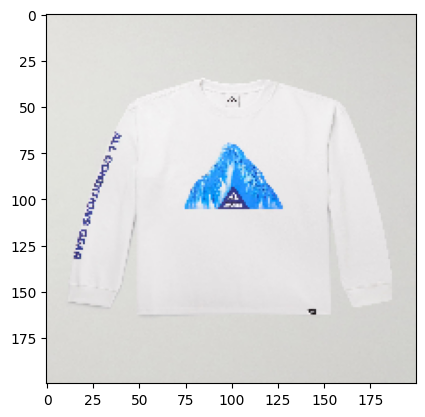

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Light


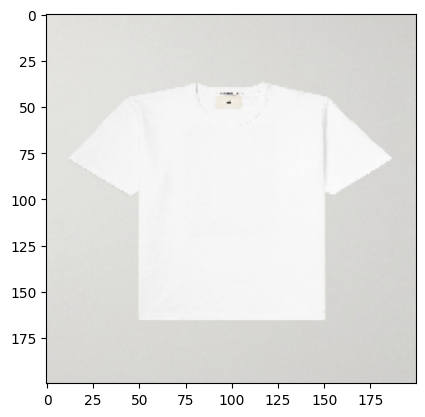

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Light


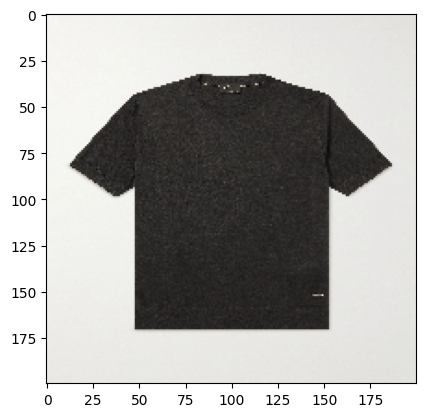

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dark


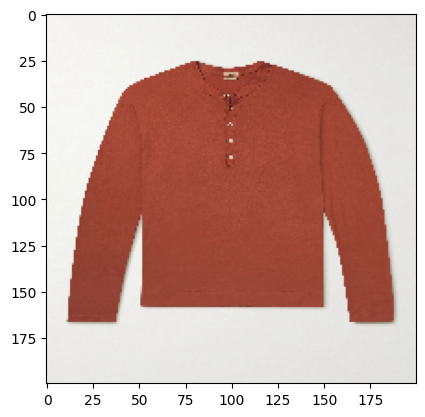

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dark


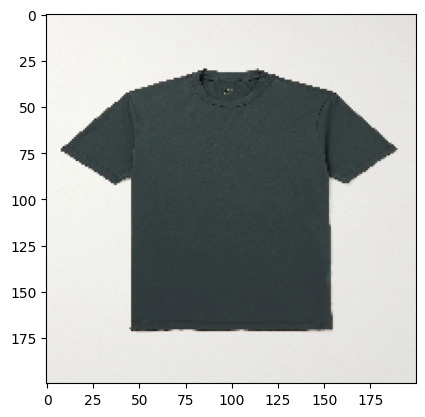

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dark


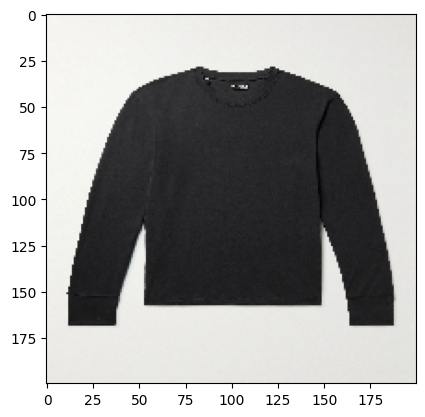

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Dark


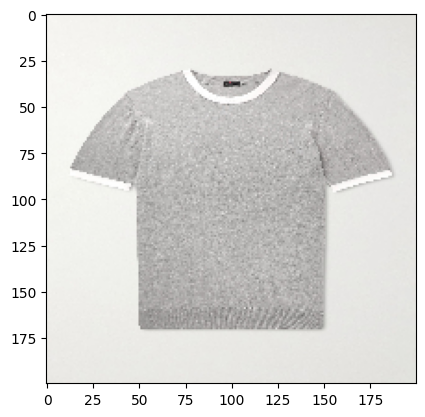

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Light


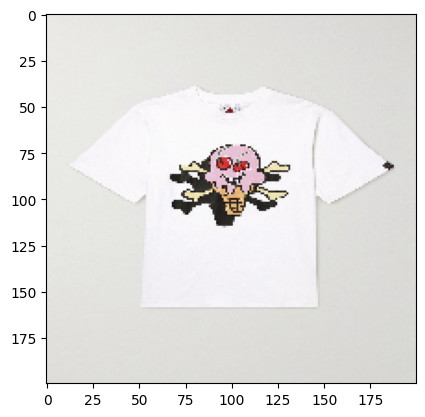

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Light


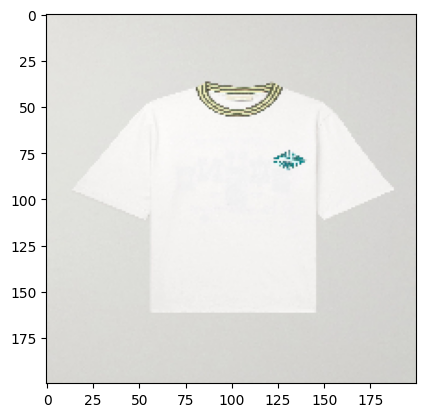

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Light


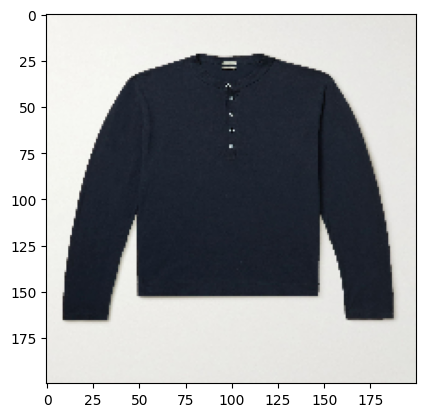

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dark


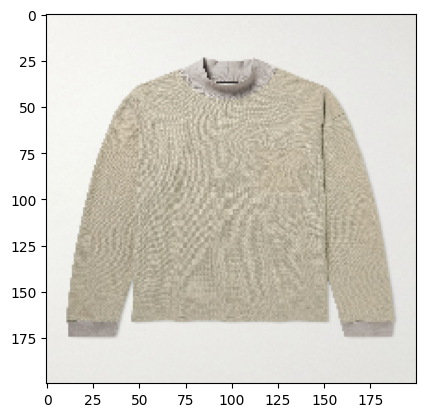

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Light


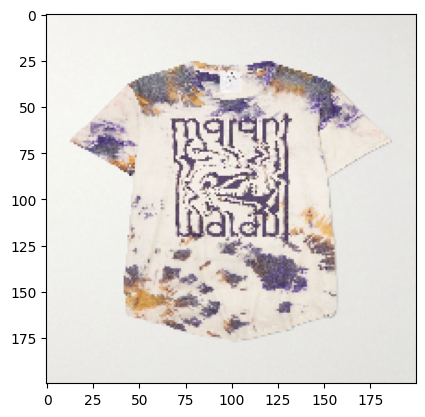

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Light


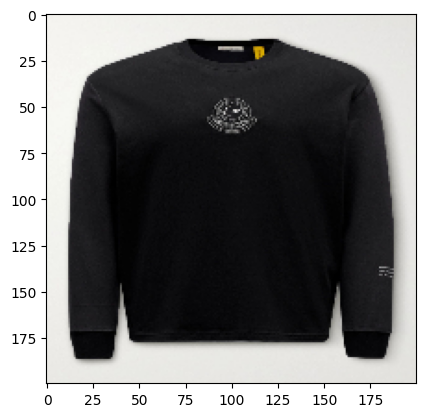

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Dark


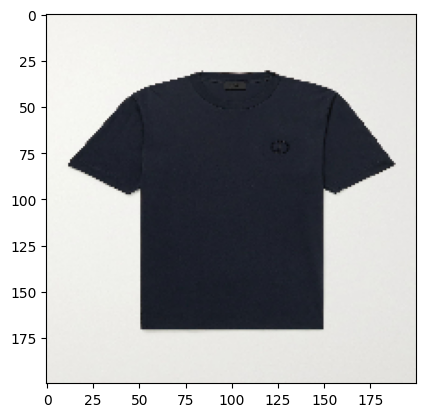

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Dark


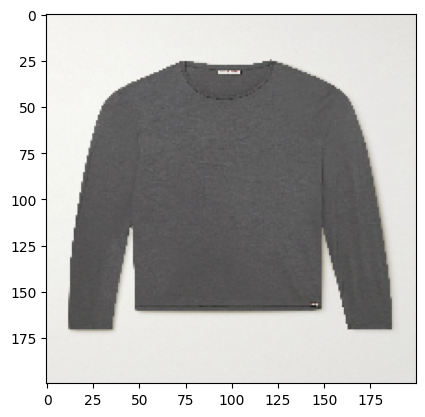

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Dark


In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = r"D:\AI\light_dark_cnn\test"



for filename in os.listdir(dir_path):
    img_path = os.path.join(dir_path, filename)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    result = loaded_model.predict(X)
    prediction = np.argmax(result) 
    
    if prediction == 0:
        print("Dark")
    else:
        print('Light')
